#✅ Introdução

Quando realizamos um teste de hipótese, duas situações de erro podem acontecer. É fundamental entender esses erros para interpretar corretamente os resultados estatísticos.

# ❌ O que é Erro Tipo I?

Ocorre quando rejeitamos a hipótese nula, mesmo ela sendo verdadeira. É chamado de "falso positivo".


Em um julgamento, a hipótese nula (H0) é que o réu é inocente. Se o tribunal rejeita H0 e condena o réu, mesmo que ele seja inocente, cometeu um Erro Tipo I (falso positivo — condenar um inocente).

Exemplo na saúde: Um exame de diagnóstico que indica que um paciente tem uma doença quando na verdade ele está saudável.

#📈 Qual a relação do Erro tipo I e o nível de significância (α)?

A probabilidade de cometer um erro Tipo I (isto é, rejeitar a hipótese nula quando ela é verdadeira) é definida pelo nível de significância α. Em outras palavras: Quando você escolhe α = 0,05, você está aceitando que, mesmo que a hipótese nula seja verdadeira, você vai cometer um erro Tipo I em 5% dos casos. Então, α é uma escolha feita antes de olhar os dados — uma definição prévia de risco que você aceita como tolerável para o seu estudo.

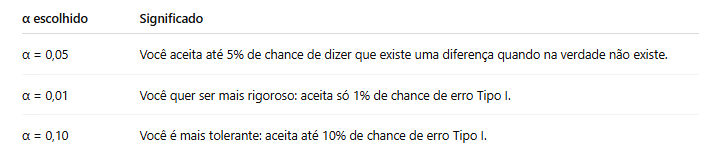

Mas cuidado! O que muita gente confunde é:
* α é definido antes do estudo.
* p-valor é calculado depois dos dados serem coletados.

➔ O p-valor é então comparado ao α para decidir:
* Se p < α → rejeitamos a hipótese nula.
* Se p ≥ α → não rejeitamos a hipótese nula.



> "α define o risco que aceitamos cometer ao rejeitar H₀. O p-valor é o que medimos depois, para ver se cruzamos esse limite."



# ❌ O que é Erro Tipo II?

Ocorre quando não rejeitamos a hipótese nula, mesmo ela sendo falsa. É chamado de "falso negativo". O Erro Tipo II é representado pela letra grega β (beta).




Em um julgamento, a hipótese nula é que o réu é inocente. Se o tribunal não rejeita H0 (ou seja, não condena) e o réu é de fato culpado, cometeu um Erro Tipo II (falso negativo — absolver um culpado).

Exemplo na saúde: Um exame que indica que o paciente está saudável quando ele realmente tem uma doença.


#📈 Qual a relação do Erro tipo II e o poder estatístico?

Assim como definimos o nível de significância (α) antes de coletar os dados,
também definimos o valor de β aceitável antes, durante o planejamento do estudo. Quando desenhamos um estudo (por exemplo, um ensaio clínico ou uma pesquisa estatística), nós planejamos:

* α = quanto risco aceitamos cometer um erro Tipo I (geralmente adotado como: 5% ou 0,05).
* β = quanto risco aceitamos cometer um erro Tipo II (geralmente adotadoo como: 20% ou 0,20).

O poder estatístico de um teste é a probabilidade de detectar um efeito real quando ele realmente existe. Ele é oo complementar de Beta.

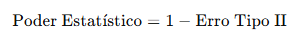

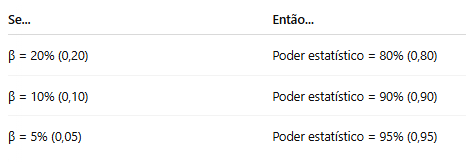

Então:

* Quanto maior o Erro Tipo II (β) → menor é o Poder Estatístico (1 - β).
* Quanto menor o Erro Tipo II (β) → maior é o Poder Estatístico (1 - β).

Por que o poder estatístico importa?

* Se o poder estatístico for baixo, mesmo que o efeito exista, seu estudo pode não detectá-lo.

* Estudos com alto poder são mais confiáveis: se houver um efeito real, eles têm grande chance de encontrá-lo.

Falaremos posteriormente mais sobre o poder estatístico.

# 📸 Visualizando o Erro tipo I e o Erroo tipo II

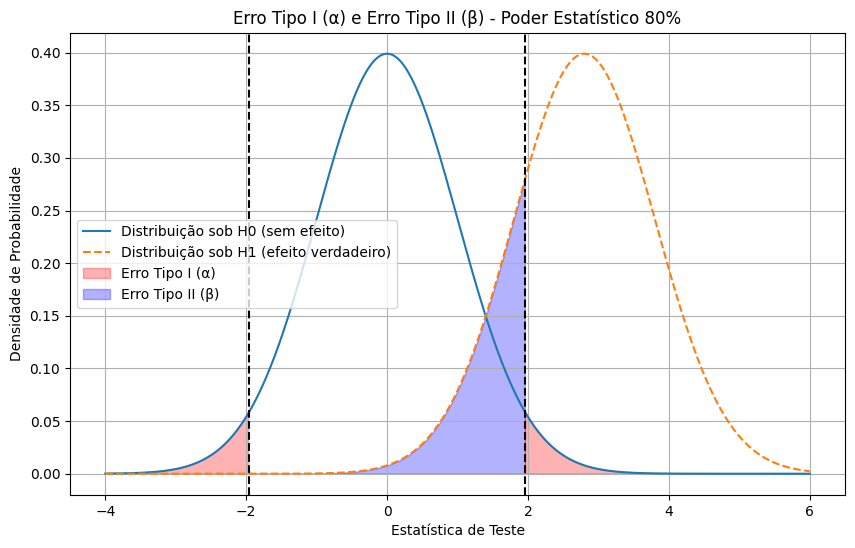

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parâmetros da distribuição sob H0 (sem efeito)
mu_H0 = 0
sigma = 1

# Definindo o limiar de rejeição para alfa = 0.05 (teste bilateral)
alpha = 0.05
z_alpha_half = norm.ppf(1 - alpha/2)  # valor crítico para 2,5% de cada lado

# Criar valores no eixo x
x = np.linspace(-4, 6, 1000)
y_H0 = norm.pdf(x, mu_H0, sigma)

# Parâmetros para H1 (efeito real ajustado para poder de 80%)
mu_H1 = 2.8
y_H1 = norm.pdf(x, mu_H1, sigma)

# Criando o gráfico
plt.figure(figsize=(10,6))
plt.plot(x, y_H0, label="Distribuição sob H0 (sem efeito)")
plt.plot(x, y_H1, label="Distribuição sob H1 (efeito verdadeiro)", linestyle='--')

# Sombrear áreas de Erro Tipo I (alfa)
plt.fill_between(x, y_H0, where=(x > z_alpha_half) | (x < -z_alpha_half), color='red', alpha=0.3, label="Erro Tipo I (α)")

# Sombrear áreas de Erro Tipo II (beta)
plt.fill_between(x, y_H1, where=(x > -z_alpha_half) & (x < z_alpha_half), color='blue', alpha=0.3, label="Erro Tipo II (β)")

# Marcar os pontos críticos
plt.axvline(z_alpha_half, color='black', linestyle='--')
plt.axvline(-z_alpha_half, color='black', linestyle='--')

# Configurações
plt.title('Erro Tipo I (α) e Erro Tipo II (β) - Poder Estatístico 80%')
plt.xlabel('Estatística de Teste')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()


As duas curvas representam o comportamento da estatística de teste quando não há efeito e quando há efeito, respectivamente.

* As pontas vermelhas (fora dos limites de corte) mostram onde rejeitamos H0 mesmo que H0 fosse verdadeira — isso é Erro Tipo I (𝛼).

* A área azul mostra onde não conseguimos rejeitar
H0
apesar de
H1
ser verdadeira — isso é Erro Tipo II (
𝛽).

* O poder estatístico do teste é a área fora da região azul, sob a curva laranja H1.